<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Financial-Risk-Management/blob/main/%EA%B3%A0%EC%A0%84%EC%A0%81_%EC%8B%9C%EA%B3%84%EC%97%B4_%EB%AA%A8%EB%8D%B8(%EC%9E%91%EC%84%B1%EC%A4%91).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


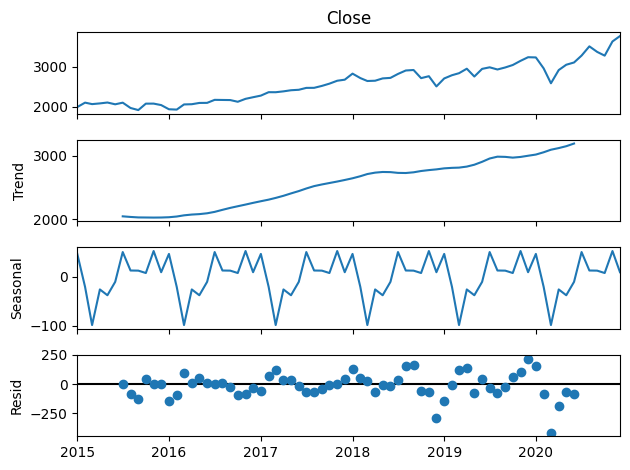

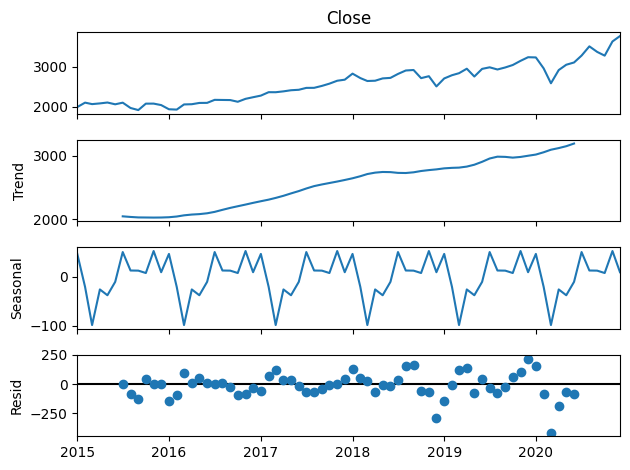

In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt


ticker = "^GSPC"  # S&P 500 지수
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2021, 1, 1)

SP_prices = yf.download(ticker, start=start, end=end, interval='1mo')


seasonal_decompose(SP_prices['Close'], model='additive', period=12).plot()


# 1. 추세

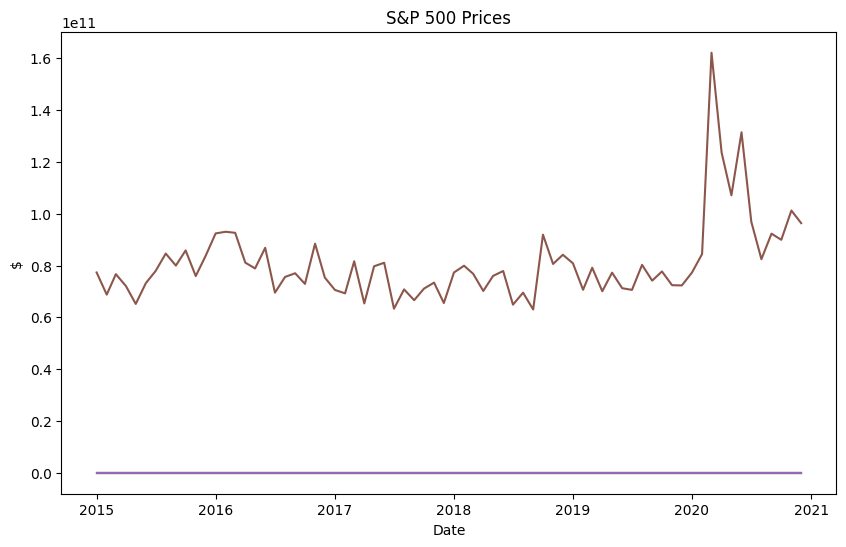

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(SP_prices)  # sp_prices는 S&P 500 데이터
plt.title('S&P 500 Prices')
plt.ylabel('$')
plt.xlabel('Date')
plt.show()

### 1. 자기상관함수(ACF)와 부분 자기상관함수(PACF):

- 자기상관함수(ACF)는 시계열 데이터에서 특정 시점과 이전 시점들 사이의 상관관계를 측정하는 통계 도구입니다.
- ACF는 시차별로 계산되며, 각 시차에 따른 자기상관계수를 보여줍니다.
- 부분 자기상관함수(PACF)는 이전 시점들의 영향이 제거된 후 해당 시점과의 관계를 측정합니다.
### 2. 자기상관계수 계산식:

- ACF의 자기상관계수는 다음과 같이 계산됩니다:

$\hat{𝜌}(ℎ)=\frac{Cov(𝑋𝑡,𝑋𝑡−ℎ)}{Var(𝑋𝑡)​}$

- 여기서 $𝑋_𝑡$ 는 현재 시점의 값, $𝑋_𝑡 X_{t−h}$ 는 $ℎ$ 시점 전의 값입니다.

### 3. ACF의 중요성:

ACF를 통해 데이터가 시간에 따라 얼마나 상관되어 있는지 확인할 수 있습니다.
이를 통해 시계열 데이터의 주기성과 패턴을 파악할 수 있으며, 특히 ARIMA 모델링에 활용됩니다.

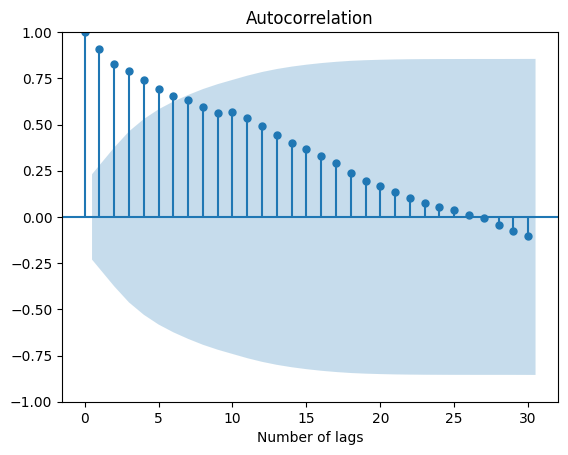

In [10]:
sm.graphics.tsa.plot_acf(SP_prices['Close'], lags=30)
plt.xlabel('Number of lags')
plt.show()


###1.ACF 그래프 해석:

- 그래프에서 시차가 0일 때의 상관관계는 항상 1이며, 시차가 증가함에 따라 자기상관계수는 점차 감소하는 패턴을 보여줍니다.
- 시차가 10을 넘어서면서부터는 상관관계가 거의 사라지거나 음의 상관관계로 바뀌는 모습을 확인할 수 있습니다.

###2.자기상관의 원인:

자기상관이 발생하는 몇 가지 주요 원인을 언급하고 있습니다.
- 이월 효과(carryover): 이전 관측치가 현재 관측치에 영향을 미치는 현상입니다.
- 잘못된 모델 지정: 데이터의 특성을 잘못 모델링한 경우 자기상관이 나타날 수 있습니다.
- 기본적으로 변수들의 선제 값 차이인 순차적 요소: 데이터 자체에 순서적인 의존성이 있을 때 발생합니다.
- 실험적인 노이즈 또는 관측 오류: 데이터 수집 과정에서 발생하는 변동이나 노이즈도 자기상관의 원인이 될 수 있습니다.

###3.부분 자기상관함수(PACF):

 - PACF는 시계열 $𝑋_𝑡$ 와 $𝑋_{𝑡−ℎ}$사이의 관계를 조사할 때, 중간에 있는 값들의 영향을 제거한 상태로 측정하는 방법입니다.
일반적으로 PACF는 빠르게 감소하거나 0에 가까워지기 때문에 MA(Q) 모델에 적합한 패턴을 확인하는 데 사용됩니다.

- ACF는 시계열 데이터의 전체적인 상관관계를 보여주지만, PACF는 중간의 영향을 제거하고 직접적인 상관관계만을 나타냅니다.
이러한 분석을 통해 적절한 ARIMA 모델의 파라미터 $𝑝$와 $𝑞$를 결정할 수 있습니다.

###4. PACF의 역할 및 특징:

- PACF는 시계열의 특정 시점과 다른 시점 사이의 상관관계에서 중간 시점의 영향을 제거한 순수한 상관관계를 측정합니다.
- PACF는 주로 AR(p) 프로세스에 적합하며, AR 모델의 적절한 시차(p)를 결정하는 데 중요한 역할을 합니다.

5. 수학적 표현:

- PACF는 다음과 같이 수학적으로 표현됩니다:

$\hat{𝜙}(ℎ)=\frac{Cov(𝑋_𝑡,𝑋_{𝑡−ℎ}∣𝑋_{𝑡−1},𝑋_{𝑡−2},…,𝑋_{𝑡−ℎ+1})}{Var(𝑋_𝑡∣𝑋_{𝑡−1},𝑋_{𝑡−2},…,𝑋_{𝑡−ℎ+1})×Var(𝑋_{𝑡−ℎ}∣𝑋_{𝑡−1},𝑋{𝑡−2},…,𝑋_{𝑡−ℎ+1})}$

- 이 식은 특정 시점 간의 상관관계를 중간 시점들의 영향을 제거한 후 계산하는 것을 보여줍니다.

(작성중)